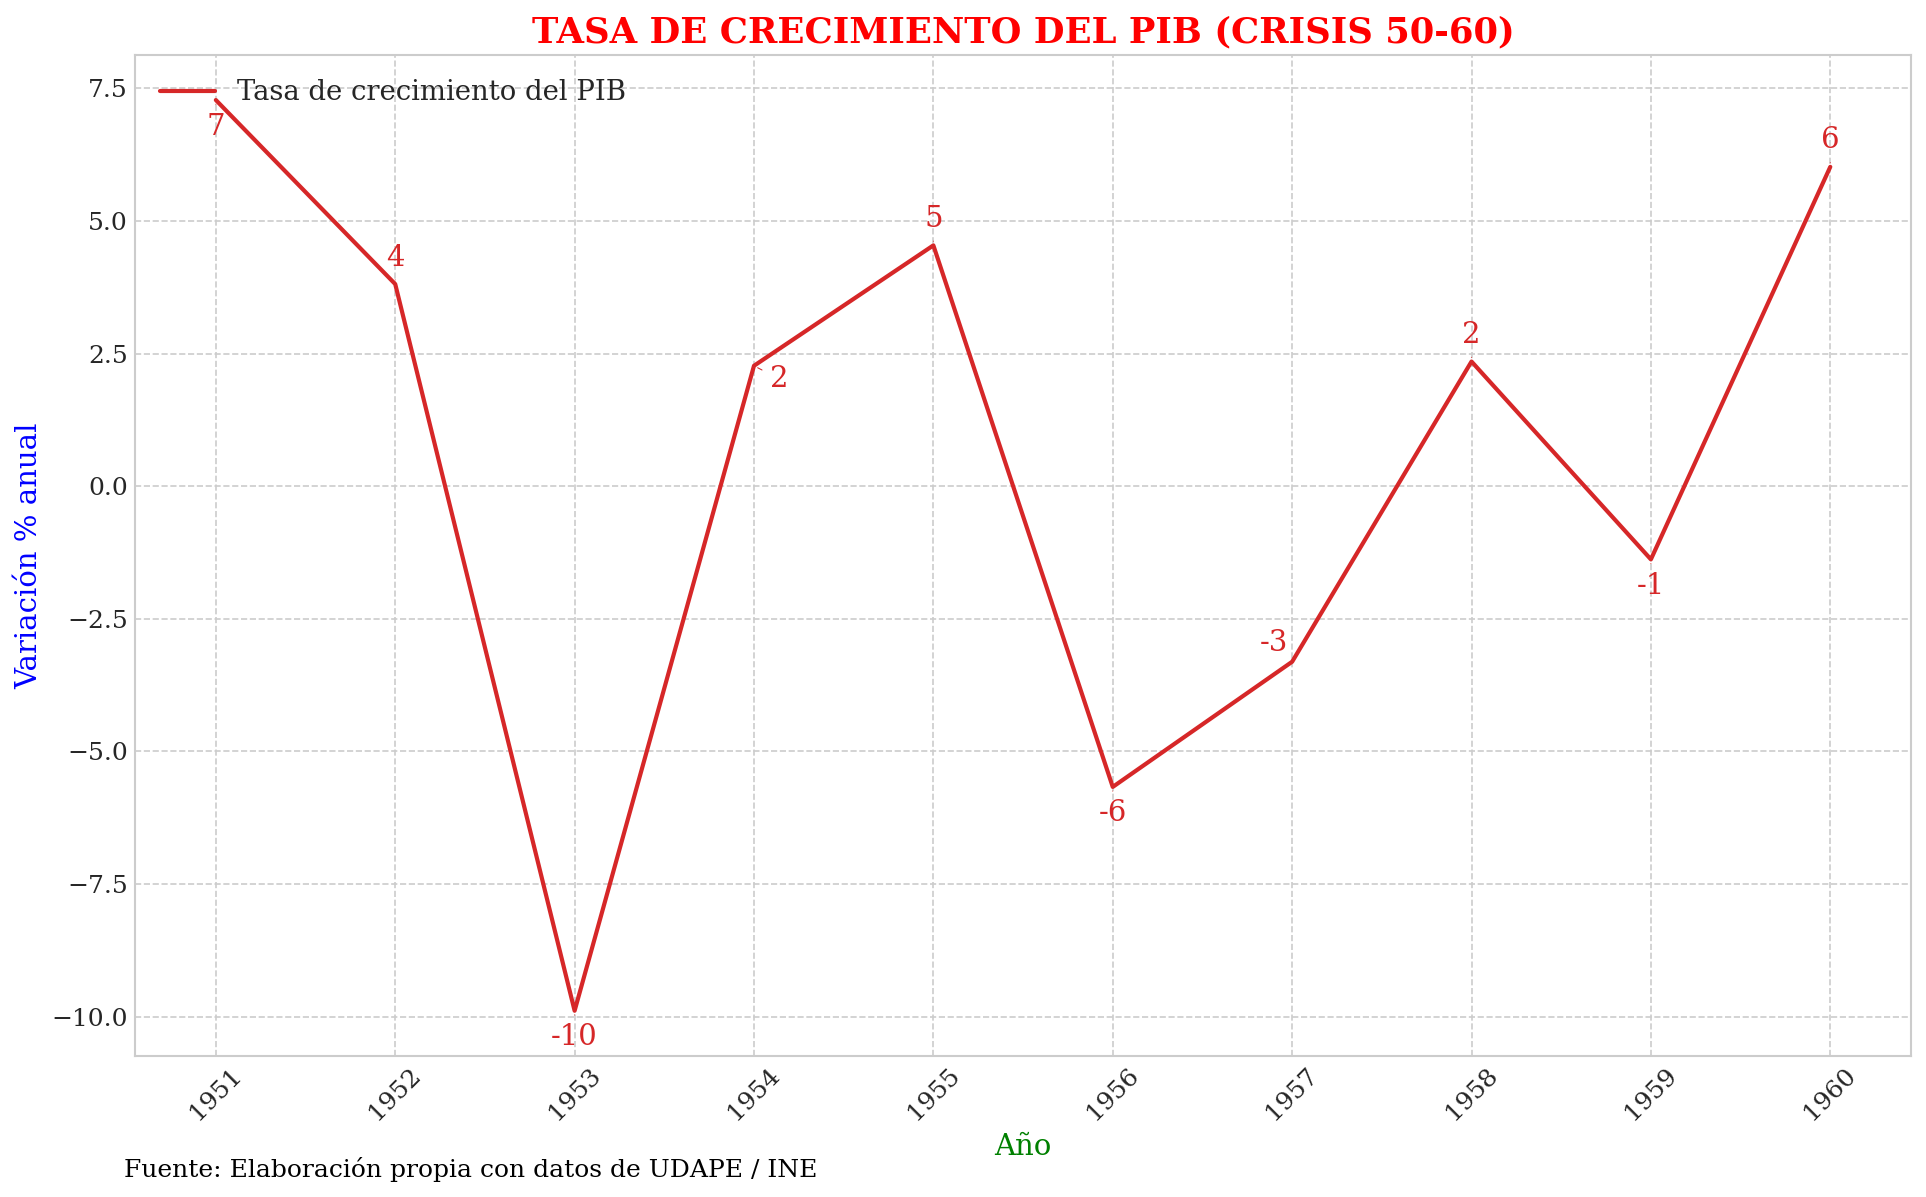

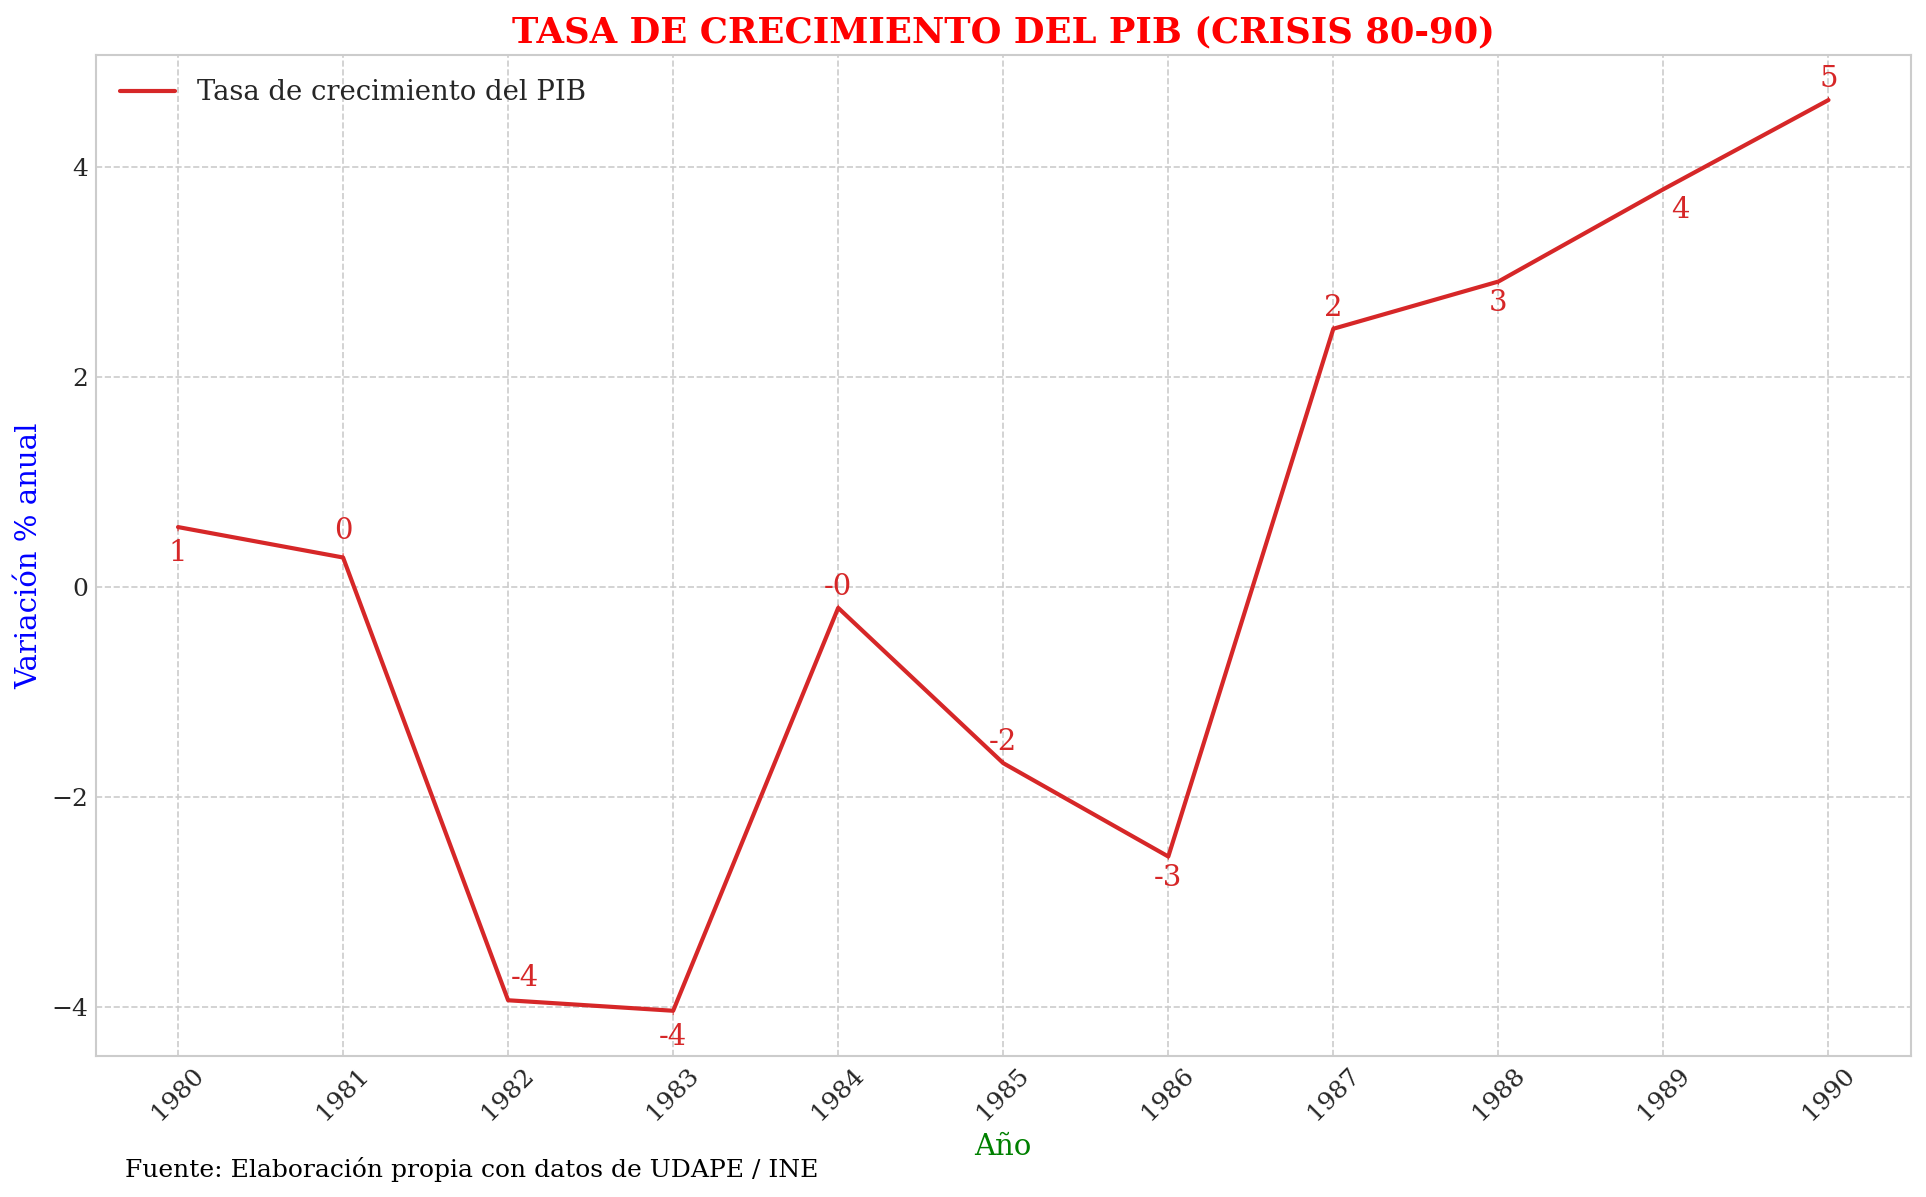

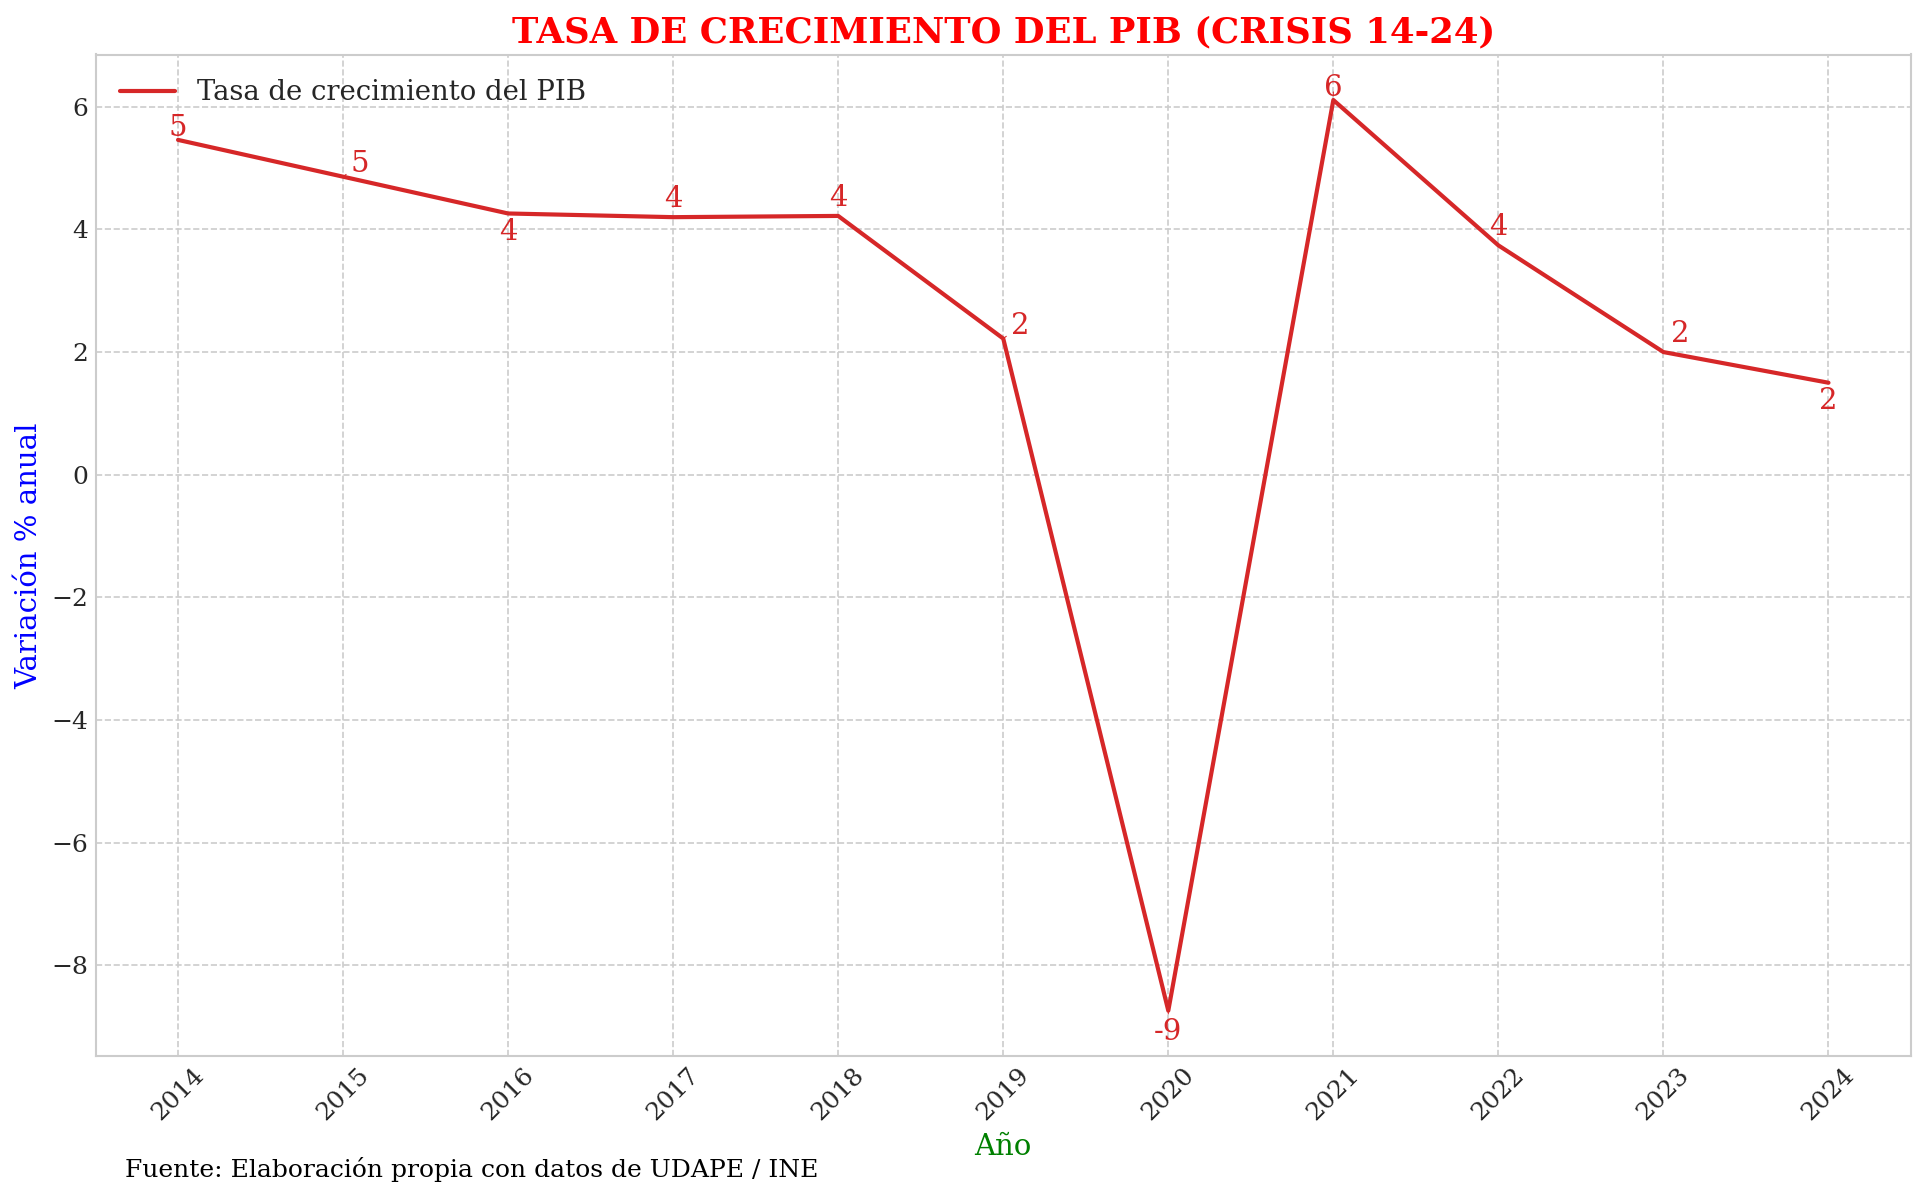

In [54]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot, add_year_value_annotations
)
from func_auxiliares.config import (
    DB_PATH, ASSETS_DIR,
    PERIODOS_PARA_CRISIS
)

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
output_dir = ASSETS_DIR / "crisis" / "tasa_crecimiento_pib"
output_dir.mkdir(parents=True, exist_ok=True)      # crea la carpeta de salida
set_style()                                        # aplica el estilo corporativo

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
SQL = """
    SELECT
      año,
      crecimiento
    FROM tasa_crecimiento_pib
"""
df = get_df(SQL, str(DB_PATH), index_col="año")

# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes       = [("crecimiento", "Tasa de crecimiento del PIB")]
cols_componentes  = [col for col, _ in componentes]
colors            = {"crecimiento": "#d62728"}        # rojo “tabla-10”

# Offsets iniciales (dx, dy). Ajusta tras ver la gráfica si alguna
# etiqueta se cruza con otra.
annotation_offsets = {
    "crecimiento": {
        1950: (-0.2,  0),
        1951: (0,  -0.5),
        1952: (0,  0.5),
        1953: (0,  -0.5),
        1954: (0.14,  -0.25),
        1955: (0,  0.5),
        1956: (0,  -0.5),
        1957: (-0.1,  0.35),
        1958: (0, 0.5),  
        1959: (0,  -0.5),
        1960: (0,  0.5),


        1980: (0,  -0.25),   
        1981: (0,  0.25),
        1982: (0.1,  0.21),
        1983: (0,  -0.25),
        1984: (0,  0.2),
        1985: (0,  0.2),
        1986: (0,  -0.2),
        1987: (0, 0.2),   
        1988: (0,  -0.2),
        1989: (0.1,  -0.2),
        1990: (0,  0.2),

        2014: (0,  0.2),  
        2015: (0.1,  0.2),   
        2016: (0, -0.3),   
        2017: (0,  0.3),
        2018: (0,  0.3),
        2019: (0.1,  0.2),
        2020: (0, -0.35),
        2021: (0,  0.2),
        2022: (0,  0.3),
        2023: (0.1,  0.3),
        2024: (0,  -0.3),
    }
}

# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    sub = df.loc[ini:fin]
    if sub.empty or len(sub) < 3:
        print(f"Subperíodo {nombre} tiene menos de 3 datos, omitiendo.")
        continue

    years_to_annot = list(sub.index)

    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"TASA DE CRECIMIENTO DEL PIB ({nombre.upper()})",
        xlabel="Año",
        ylabel="Variación % anual",
        source_text="Fuente: Elaboración propia con datos de UDAPE / INE",
    )

    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.5,
    )

    fig.savefig(output_dir / f"tasa_crecimiento_pib_{nombre}.png")
    plt.show()
    plt.close(fig)


In [ ]:
# 2. Convertir a Series
ser = df.index.to_series()
# 3. Calcular diferencias
dif = ser.diff()
# 4. Quitar NaN inicial
dif_clean = dif.dropna()
print(type(dif_clean)) 

<class 'pandas.core.series.Series'>
